In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Agriculture.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df["label"].nunique()

22

In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
x=df.drop("label",axis=1)

<AxesSubplot:>

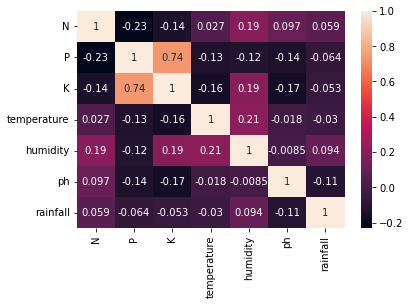

In [10]:
sns.heatmap(df.corr(),annot=True)

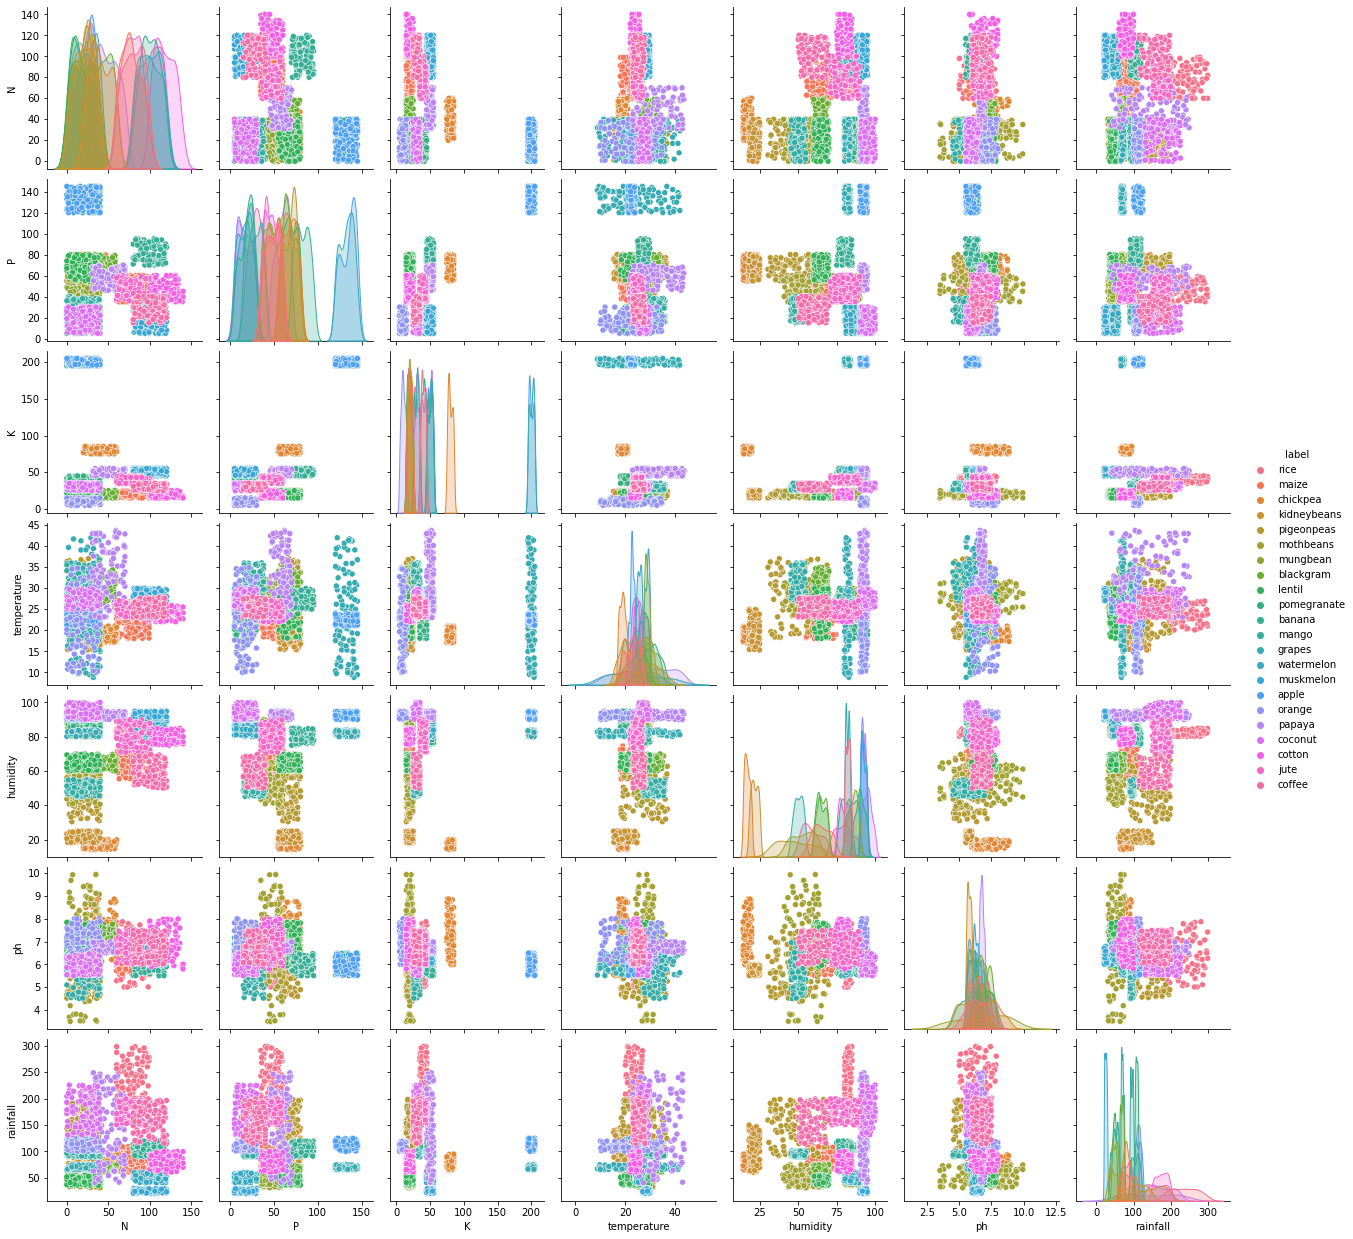

In [11]:
sns.pairplot(df,hue="label")

In [12]:
y=df["label"]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=24)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model=RandomForestClassifier()

In [16]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
bas_pred=model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [19]:
confusion_matrix(y_test,bas_pred)

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,

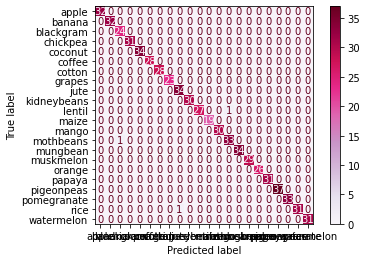

In [20]:
plot_confusion_matrix(model,x_test,y_test,cmap='PuRd')

In [21]:
print(classification_report(y_test,bas_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        32
   blackgram       0.96      1.00      0.98        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.97      1.00      0.99        34
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.96      0.98        28
       maize       1.00      1.00      1.00        19
       mango       1.00      1.00      1.00        30
   mothbeans       0.97      0.97      0.97        34
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.00        26
      papaya       1.00    

In [22]:
model.score(x_train,y_train)

1.0

In [23]:
model.score(x_test,y_test)

0.9954545454545455

In [24]:
import joblib


In [25]:
joblib.dump(model,"decmodel.pkl")

['decmodel.pkl']

In [26]:
check=df.copy()

In [27]:
check=check.head(1)

In [28]:
check

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice


In [29]:
check.drop("label",axis=1,inplace=True)

In [30]:
check

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536


In [31]:
final_model=joblib.load("decmodel.pkl")

In [32]:
final_model.predict(check)

array(['rice'], dtype=object)

In [33]:
import lime

In [34]:
from lime import lime_tabular

In [45]:
interpretor=lime_tabular.LimeTabularExplainer(
    training_data = np.array(x_train),
    feature_names = x_train.columns,
    mode = 'classification',class_names=df["label"].unique())

In [46]:
exp = interpretor.explain_instance(x_test.iloc[40], model.predict_proba, num_features=6, top_labels=2)

In [47]:
exp.show_in_notebook(show_table=True)

In [ ]:
df["label"].nunique()